In [400]:
#Trystan Carruth
#Link to Repository: https://github.com/CarruthT/DengueFeverForecasting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv('Brazil.csv')

In [401]:
df=df.drop(['ID'], axis=1) #drop ID column used to signify world region
df = df.sort_values(['Year', 'EW'], ascending=[True, True]) #sort by time, both year and epidemiological week
df= df.drop(df.index[486:]) #drop repeated values with no data
df = df.rename(columns={df.columns[-1]: 'Suspected Cases'})
df = df.rename(columns={df.columns[-2]: 'Severe Dengue'})

In [402]:
df
#data ready for analysis

,Country or Subregion,Serotype,Year,In / Out of Subregions,EW,(C/TC) x100 (e),(SD/D) x100 (e),CFR (f),Confirmed,Deaths,Epidemiological Week (a),Incidence Rate (c),Population X 1000,Severe Dengue,Suspected Cases
318,Brazil,"DEN 1,2,3,4",2014,Out,1,31.072210,0.109409,0.109,1420.0,5,1,2.26,202034,5,4570
293,Brazil,"DEN 1,2,3,4",2014,Out,2,32.624180,0.131209,0.103,3481.0,11,2,5.28,202034,14,10670
266,Brazil,"DEN 1,2,3,4",2014,Out,3,33.945891,0.136124,0.102,5985.0,18,3,8.73,202034,24,17631
294,Brazil,"DEN 1,2,3,4",2014,Out,4,35.354739,0.138435,0.096,9194.0,25,4,12.87,202034,36,26005
343,Brazil,"DEN 1,2,3,4",2014,Out,5,36.984992,0.137710,0.104,13160.0,37,5,17.61,202034,49,35582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Brazil,"DEN 1,2",2023,Out,14,39.284884,0.047750,0.030,431108.0,327,14,512.82,213993,524,1097389
192,Brazil,"DEN 1,2",2023,Out,15,38.595220,0.046911,0.029,482123.0,359,15,583.75,213993,586,1249178
145,Brazil,"DEN 1,2",2023,Out,16,37.949360,0.045472,0.027,520773.0,377,16,641.28,213993,624,1372284
152,Brazil,"DEN 1,2",2023,Out,17,37.187025,0.044162,0.026,544810.0,384,17,684.63,213993,647,1465054


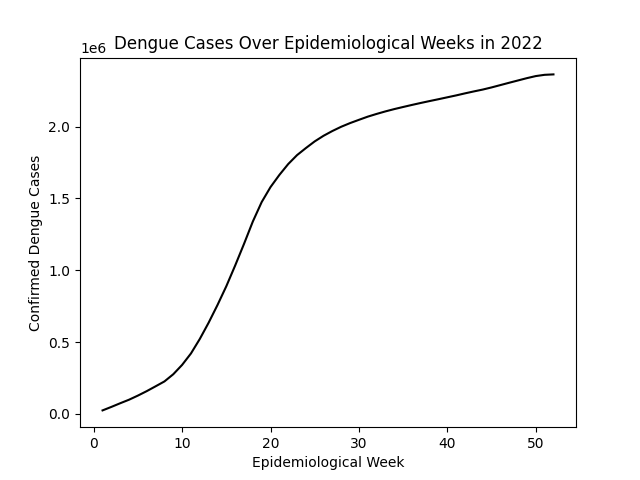

In [287]:
# Filter the DataFrame for the year 2022
df_2022 = df[df['Year'] == 2022]

# Create the Seaborn line plot
sns.lineplot(x='EW', y='Suspected Cases', data=df_2022)

# Set the plot title and labels
plt.title('Dengue Cases Over Epidemiological Weeks in 2022')
plt.xlabel('Epidemiological Week')
plt.ylabel('Confirmed Dengue Cases')

# Show the plot
plt.show()

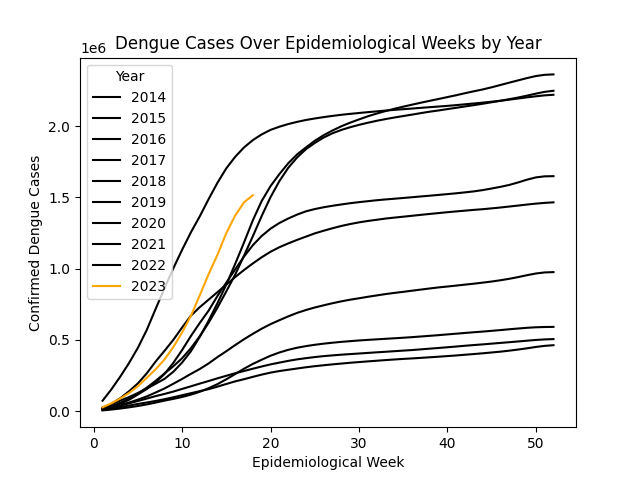

In [288]:

# Create the Seaborn line plot with color differentiation
sns.lineplot(x='EW', y='Suspected Cases', hue='Year',errorbar=None, data=df, palette=['black'] * (df['Year'].nunique() - 1) + ['orange'])



# Set the plot title and labels
plt.title('Dengue Cases Over Epidemiological Weeks by Year')
plt.xlabel('Epidemiological Week')
plt.ylabel('Confirmed Dengue Cases')

# Show the plot
plt.show()

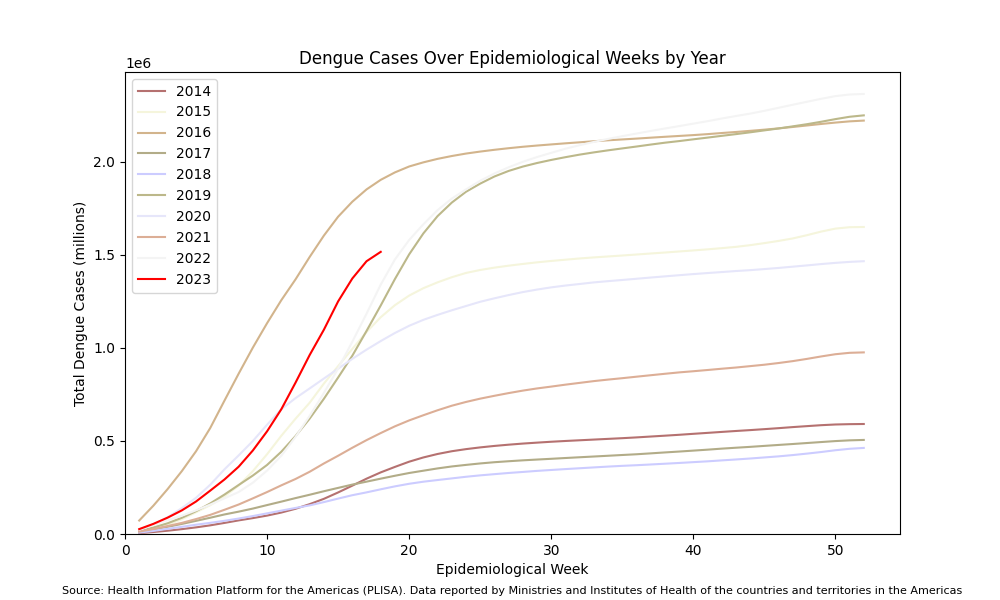

In [389]:
# Filter the DataFrame for the year 2023
df_2023 = df[df['Year'] == 2023]

# Create a larger figure
plt.figure(figsize=(10, 6))

# Define a list of 9 dull colors
dull_colors = ['#b57170', '#f5f5dc', '#d2b48c', '#b2ac88', '#CCCCFF', '#bcb88a', '#e6e6fa', '#dcae96', '#F4F4F4']

# Create the custom palette by combining dull colors with orange for 2023
palette = dull_colors + ['red']

# Create the Seaborn line plot for years other than 2023 (dull colors)
sns.lineplot(x='EW', y='Suspected Cases', hue='Year', data=df[df['Year'] != 2023], palette=palette[:-1])

# Create the Seaborn line plot for the year 2023 (orange color)
sns.lineplot(x='EW', y='Suspected Cases', data=df_2023[df_2023['EW'] <= 18], color=palette[-1], label='2023')

# Set the plot title and labels
plt.title('Dengue Cases Over Epidemiological Weeks by Year')
plt.xlabel('Epidemiological Week')
plt.ylabel('Total Dengue Cases (millions)')
plt.ylim(0)
plt.xlim(0)
# Show the legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.13, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')

# Show the plot
plt.show()


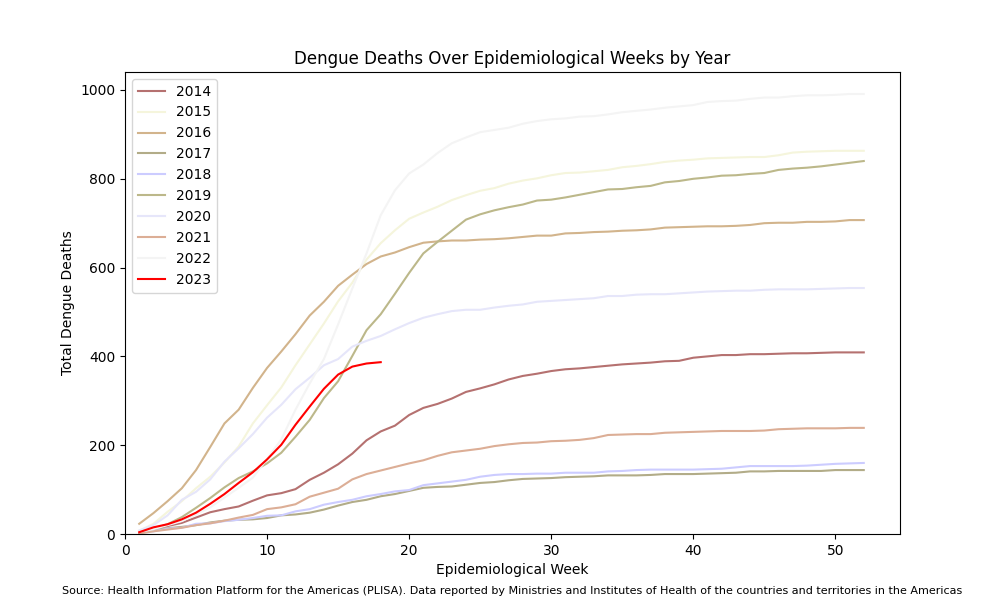

In [392]:
# Filter the DataFrame for the year 2023
df_2023 = df[df['Year'] == 2023]

# Create a larger figure
plt.figure(figsize=(10, 6))

# Define a list of 9 dull colors
dull_colors = ['#b57170', '#f5f5dc', '#d2b48c', '#b2ac88', '#CCCCFF', '#bcb88a', '#e6e6fa', '#dcae96', '#F4F4F4']

# Create the custom palette by combining dull colors with orange for 2023
palette = dull_colors + ['red']

# Create the Seaborn line plot for years other than 2023 (dull colors)
sns.lineplot(x='EW', y='Deaths', hue='Year', data=df[df['Year'] != 2023], palette=palette[:-1])

# Create the Seaborn line plot for the year 2023 (orange color)
sns.lineplot(x='EW', y='Deaths', data=df_2023[df_2023['EW'] <= 18], color=palette[-1], label='2023')

# Set the plot title and labels
plt.title('Dengue Deaths Over Epidemiological Weeks by Year')
plt.xlabel('Epidemiological Week')
plt.ylabel('Total Dengue Deaths')
plt.ylim(0)
plt.xlim(0)
# Show the legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.13, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')

# Show the plot
plt.show()


In [290]:
# Calculate the number of new cases (difference between consecutive values)
df['New Cases'] = df.groupby('Year')['Suspected Cases'].diff().fillna(0)
# Filter the DataFrame for the year 2023
df_2023 = df[df['Year'] == 2023]

In [411]:
# Calculate the number of new cases (difference between consecutive values)
df['New Deaths'] = df.groupby('Year')['Deaths'].diff().fillna(0)
# Filter the DataFrame for the year 2023
df_2023 = df[df['Year'] == 2023]

In [291]:
df['New Cases']

318         0.0
293      6100.0
266      6961.0
294      8374.0
343      9577.0
         ...   
193    135769.0
192    151789.0
145    123106.0
152     92770.0
146     50406.0
Name: New Cases, Length: 486, dtype: float64

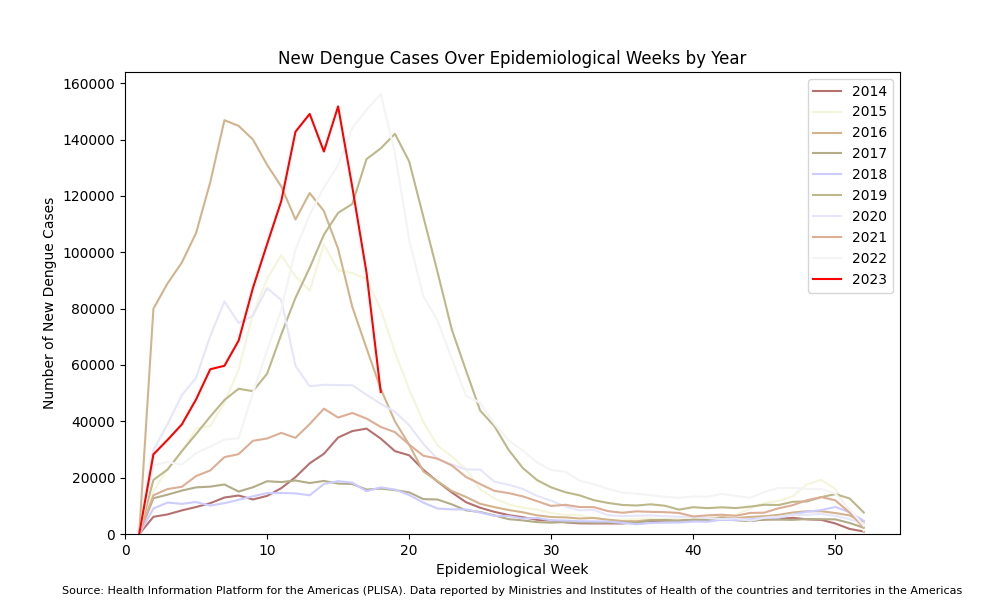

In [397]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Define a list of 9 dull colors
dull_colors = ['#b57170', '#f5f5dc', '#d2b48c', '#b2ac88', '#CCCCFF', '#bcb88a', '#e6e6fa', '#dcae96', '#F4F4F4']

# Create the custom palette by combining dull colors with orange for 2023
palette = dull_colors + ['red']

# Create the Seaborn line plot for years other than 2023 (dull colors)
sns.lineplot(x='EW', y='New Cases', hue='Year', data=df[df['Year'] != 2023], palette=palette[:-1])

# Create the Seaborn line plot for the year 2023 (orange color)
sns.lineplot(x='EW', y='New Cases', data=df_2023[df_2023['EW'] <= 18], color=palette[-1], label='2023')

# Set the plot title and labels
plt.title('New Dengue Cases Over Epidemiological Weeks by Year')
plt.xlabel('Epidemiological Week')
plt.ylabel('Number of New Dengue Cases')

plt.ylim(0)
plt.xlim(0)
# Show the legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.13, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')

# Show the plot
# Display the plot
plt.show()


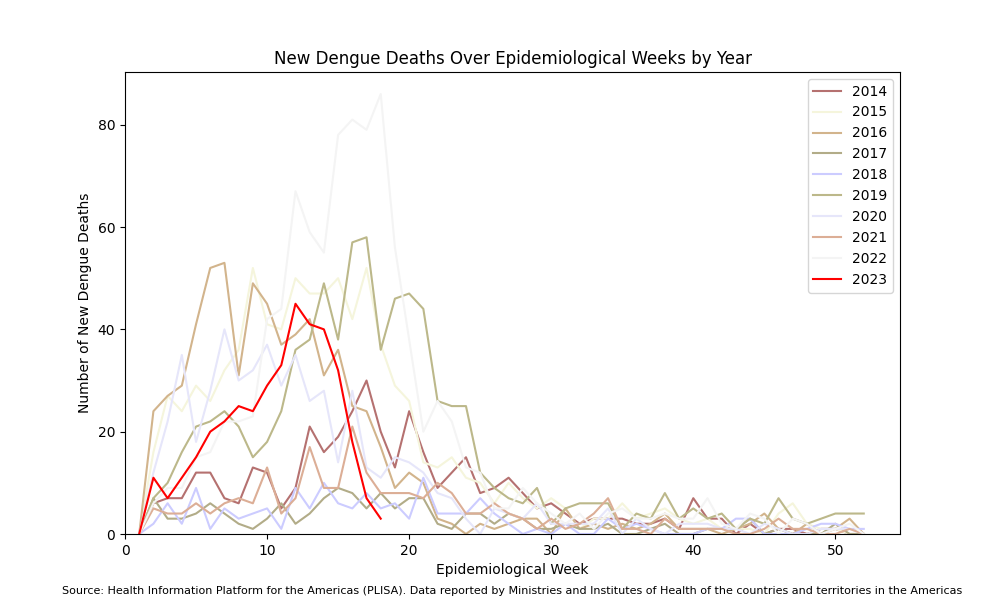

In [398]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Define a list of 9 dull colors
dull_colors = ['#b57170', '#f5f5dc', '#d2b48c', '#b2ac88', '#CCCCFF', '#bcb88a', '#e6e6fa', '#dcae96', '#F4F4F4']

# Create the custom palette by combining dull colors with orange for 2023
palette = dull_colors + ['red']

# Create the Seaborn line plot for years other than 2023 (dull colors)
sns.lineplot(x='EW', y='New Deaths', hue='Year', data=df[df['Year'] != 2023], palette=palette[:-1])

# Create the Seaborn line plot for the year 2023 (orange color)
sns.lineplot(x='EW', y='New Deaths', data=df_2023[df_2023['EW'] <= 18], color=palette[-1], label='2023')

# Set the plot title and labels
plt.title('New Dengue Deaths Over Epidemiological Weeks by Year')
plt.xlabel('Epidemiological Week')
plt.ylabel('Number of New Dengue Deaths')

plt.ylim(0)
plt.xlim(0)
# Show the legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.13, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')

# Show the plot
# Display the plot
plt.show()


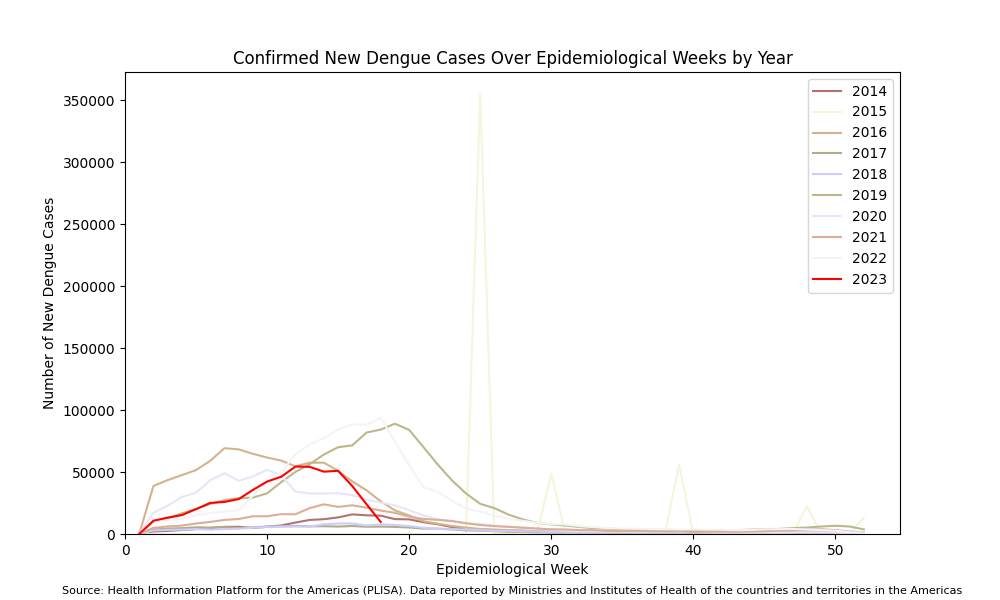

In [390]:
# Calculate the number of new cases (difference between consecutive values)
df['Confirmed New Cases'] = df.groupby('Year')['Confirmed'].diff().fillna(0)
# Filter the DataFrame for the year 2023
df_2023 = df[df['Year'] == 2023]

# Create a larger figure
plt.figure(figsize=(10, 6))

# Define a list of 9 dull colors
dull_colors = ['#b57170', '#f5f5dc', '#d2b48c', '#b2ac88', '#CCCCFF', '#bcb88a', '#e6e6fa', '#dcae96', '#F4F4F4']

# Create the custom palette by combining dull colors with orange for 2023
palette = dull_colors + ['red']

# Create the Seaborn line plot for years other than 2023 (dull colors)
sns.lineplot(x='EW', y='Confirmed New Cases', hue='Year', data=df[df['Year'] != 2023], palette=palette[:-1])

# Create the Seaborn line plot for the year 2023 (orange color)
sns.lineplot(x='EW', y='Confirmed New Cases', data=df_2023[df_2023['EW'] <= 18], color=palette[-1], label='2023')

# Set the plot title and labels
plt.title('Confirmed New Dengue Cases Over Epidemiological Weeks by Year')
plt.xlabel('Epidemiological Week')
plt.ylabel('Number of New Dengue Cases')

plt.ylim(0)
plt.xlim(0)
# Show the legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.13, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')

# Show the plot
# Display the plot
plt.show()


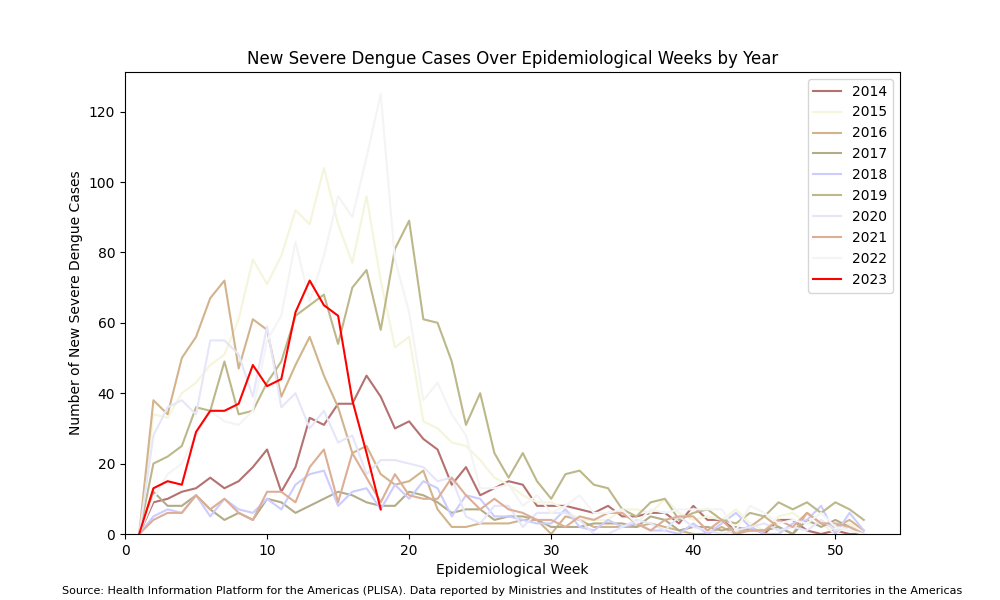

In [403]:
# Calculate the number of new cases (difference between consecutive values)
df['Severe New Cases'] = df.groupby('Year')['Severe Dengue'].diff().fillna(0)
# Filter the DataFrame for the year 2023
df_2023 = df[df['Year'] == 2023]

# Create a larger figure
plt.figure(figsize=(10, 6))

# Define a list of 9 dull colors
dull_colors = ['#b57170', '#f5f5dc', '#d2b48c', '#b2ac88', '#CCCCFF', '#bcb88a', '#e6e6fa', '#dcae96', '#F4F4F4']

# Create the custom palette by combining dull colors with orange for 2023
palette = dull_colors + ['red']

# Create the Seaborn line plot for years other than 2023 (dull colors)
sns.lineplot(x='EW', y='Severe New Cases', hue='Year', data=df[df['Year'] != 2023], palette=palette[:-1])

# Create the Seaborn line plot for the year 2023 (orange color)
sns.lineplot(x='EW', y='Severe New Cases', data=df_2023[df_2023['EW'] <= 18], color=palette[-1], label='2023')

# Set the plot title and labels
plt.title('New Severe Dengue Cases Over Epidemiological Weeks by Year')
plt.xlabel('Epidemiological Week')
plt.ylabel('Number of New Severe Dengue Cases')

plt.ylim(0)
plt.xlim(0)
# Show the legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.13, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')

# Show the plot
# Display the plot
plt.show()


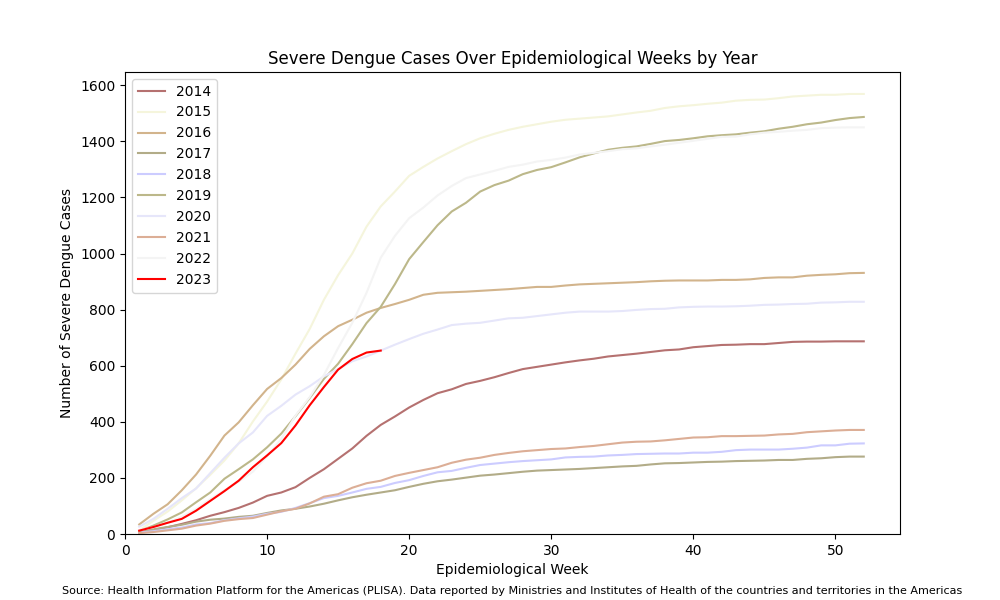

In [404]:

# Create a larger figure
plt.figure(figsize=(10, 6))

# Define a list of 9 dull colors
dull_colors = ['#b57170', '#f5f5dc', '#d2b48c', '#b2ac88', '#CCCCFF', '#bcb88a', '#e6e6fa', '#dcae96', '#F4F4F4']

# Create the custom palette by combining dull colors with orange for 2023
palette = dull_colors + ['red']

# Create the Seaborn line plot for years other than 2023 (dull colors)
sns.lineplot(x='EW', y='Severe Dengue', hue='Year', data=df[df['Year'] != 2023], palette=palette[:-1])

# Create the Seaborn line plot for the year 2023 (orange color)
sns.lineplot(x='EW', y='Severe Dengue', data=df_2023[df_2023['EW'] <= 18], color=palette[-1], label='2023')

# Set the plot title and labels
plt.title('Severe Dengue Cases Over Epidemiological Weeks by Year')
plt.xlabel('Epidemiological Week')
plt.ylabel('Number of Severe Dengue Cases')

plt.ylim(0)
plt.xlim(0)
# Show the legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.13, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')

# Show the plot
# Display the plot
plt.show()


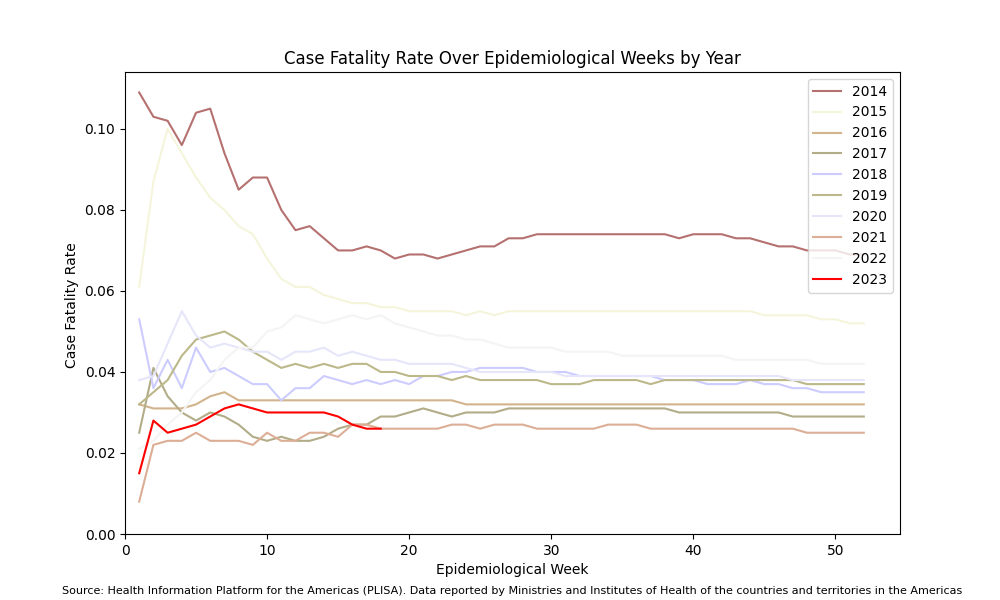

In [406]:

# Create a larger figure
plt.figure(figsize=(10, 6))

# Define a list of 9 dull colors
dull_colors = ['#b57170', '#f5f5dc', '#d2b48c', '#b2ac88', '#CCCCFF', '#bcb88a', '#e6e6fa', '#dcae96', '#F4F4F4']

# Create the custom palette by combining dull colors with orange for 2023
palette = dull_colors + ['red']

# Create the Seaborn line plot for years other than 2023 (dull colors)
sns.lineplot(x='EW', y='CFR (f)', hue='Year', data=df[df['Year'] != 2023], palette=palette[:-1])

# Create the Seaborn line plot for the year 2023 (orange color)
sns.lineplot(x='EW', y='CFR (f)', data=df_2023[df_2023['EW'] <= 18], color=palette[-1], label='2023')

# Set the plot title and labels
plt.title('Case Fatality Rate Over Epidemiological Weeks by Year')
plt.xlabel('Epidemiological Week')
plt.ylabel('Case Fatality Rate ')

plt.ylim(0)
plt.xlim(0)
# Show the legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.13, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')

# Show the plot
# Display the plot
plt.show()


In [422]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare the data
filtered_df = df[(df['Year'] != 2023) | df['EW']!=18]

# Create a time series
time_series = pd.Series(filtered_df['Suspected Cases'].values, index=filtered_df['EW'])

# Reset the index
time_series = time_series.reset_index(drop=True)



In [423]:
# Fit the SARIMAX model
model = SARIMAX(time_series, order=(1, 0, 1), seasonal_order=(1, 0, 1, 52))
results = model.fit()

# Generate forecasts
forecast_start_week = time_series.index.max() + 1
forecast_end_week = forecast_start_week + 35
forecast = results.get_forecast(steps=35)

# Extract forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

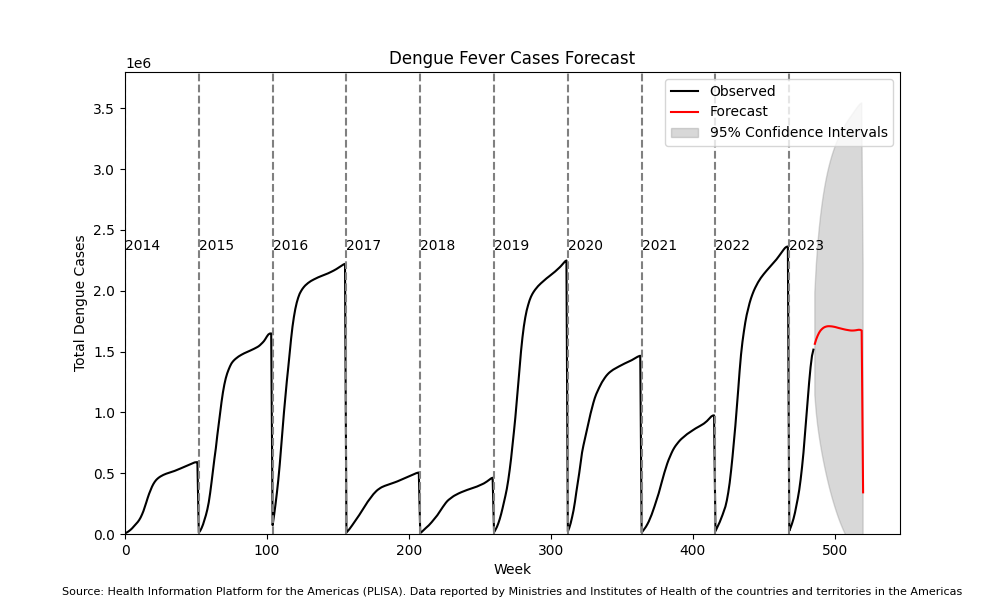

In [424]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the observed data
plt.plot(time_series.index, time_series.values, label='Observed')

# Plot the forecasted values
plt.plot(range(forecast_start_week, forecast_end_week), forecasted_values, color='r', label='Forecast')

# Plot the confidence intervals
plt.fill_between(range(forecast_start_week, forecast_end_week), confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.3, label='95% Confidence Intervals')

# Add lines and labels for each year
for year in range(2014, 2024):
    week = (year - 2014) * 52
    plt.axvline(x=week, color='gray', linestyle='--')
    plt.text(week, time_series.max(), str(year), rotation=0, verticalalignment='center')

# Set plot title and labels
plt.title('Dengue Fever Cases Forecast')
plt.xlabel('Week')
plt.ylabel('Total Dengue Cases')

plt.ylim(0)
plt.xlim(0)
# Add legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.133, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')

# Display the plot
plt.show()


In [419]:
# Prepare the data
filtered_df = df[(df['Year'] != 2023) | df['EW']!=18]

# Create a time series
time_series = pd.Series(filtered_df['Deaths'].values, index=filtered_df['EW'])

# Reset the index
time_series = time_series.reset_index(drop=True)


In [420]:
# Fit the SARIMAX model
model = SARIMAX(time_series, order=(1, 0, 1), seasonal_order=(1, 0, 1, 52))
results = model.fit()

# Generate forecasts
forecast_start_week = time_series.index.max() + 1
forecast_end_week = forecast_start_week + 35
forecast = results.get_forecast(steps=35)

# Extract forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

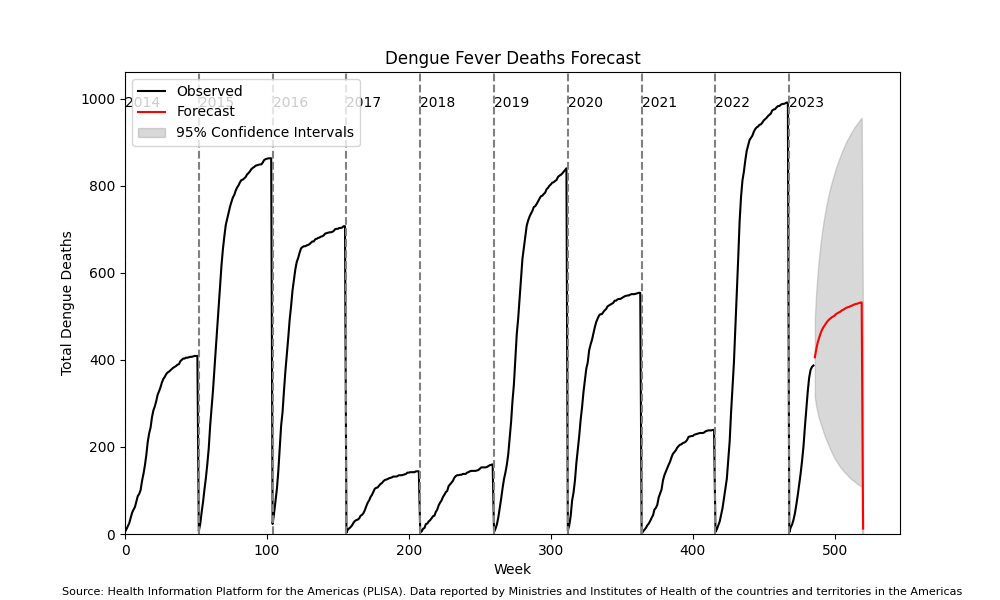

In [421]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the observed data
plt.plot(time_series.index, time_series.values, label='Observed')

# Plot the forecasted values
plt.plot(range(forecast_start_week, forecast_end_week), forecasted_values, color='r', label='Forecast')

# Plot the confidence intervals
plt.fill_between(range(forecast_start_week, forecast_end_week), confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.3, label='95% Confidence Intervals')

# Add lines and labels for each year
for year in range(2014, 2024):
    week = (year - 2014) * 52
    plt.axvline(x=week, color='gray', linestyle='--')
    plt.text(week, time_series.max(), str(year), rotation=0, verticalalignment='center')

# Set plot title and labels
plt.title('Dengue Fever Deaths Forecast')
plt.xlabel('Week')
plt.ylabel('Total Dengue Deaths')

plt.ylim(0)
plt.xlim(0)
# Add legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.133, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')

# Display the plot
plt.show()


In [377]:
# Prepare the data
filtered_df = df[(df['Year'] != 2023) | df['EW']!=18]

# Create a time series
time_series = pd.Series(filtered_df['New Cases'].values, index=filtered_df['EW'])

# Reset the index
time_series = time_series.reset_index(drop=True)

time_series

0           0.0
1        6100.0
2        6961.0
3        8374.0
4        9577.0
         ...   
481    135769.0
482    151789.0
483    123106.0
484     92770.0
485     50406.0
Length: 486, dtype: float64

In [382]:
# Fit the SARIMAX model
model = SARIMAX(time_series, order=(1, 0, 1), seasonal_order=(1, 0, 1, 52))
results = model.fit()

# Generate forecasts
forecast_start_week = time_series.index.max() + 1
forecast_end_week = forecast_start_week + 35
forecast = results.get_forecast(steps=35)

# Extract forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

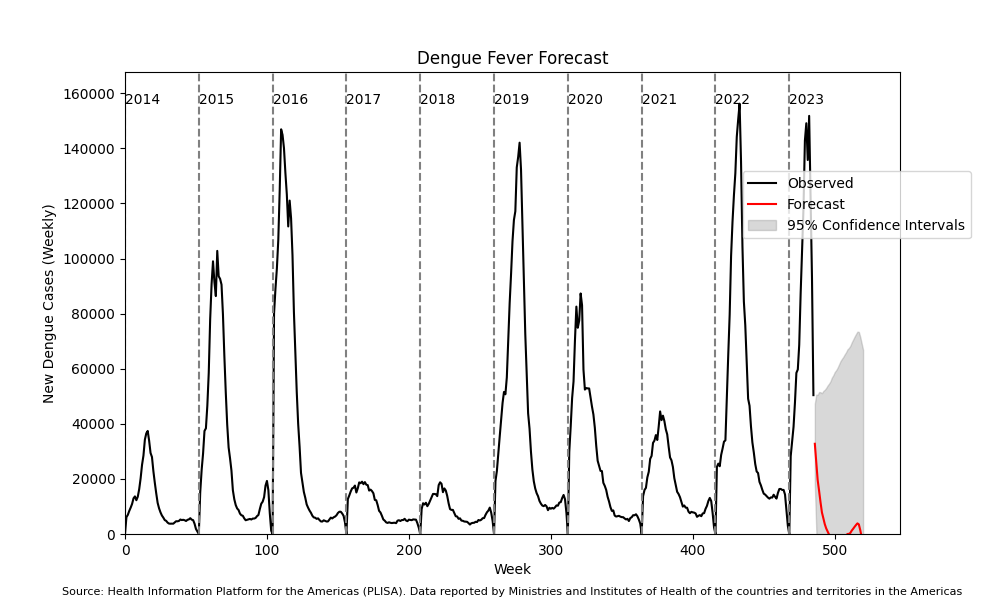

In [388]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the observed data
plt.plot(time_series.index, time_series.values, label='Observed')

# Plot the forecasted values
plt.plot(range(forecast_start_week, forecast_end_week), forecasted_values, color='r', label='Forecast')

# Plot the confidence intervals
plt.fill_between(range(forecast_start_week, forecast_end_week), confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.3, label='95% Confidence Intervals')

# Add lines and labels for each year
for year in range(2014, 2024):
    week = (year - 2014) * 52
    plt.axvline(x=week, color='gray', linestyle='--')
    plt.text(week, time_series.max(), str(year), rotation=0, verticalalignment='baseline')

# Set plot title and labels
plt.title('Dengue Fever Forecast')
plt.xlabel('Week')
plt.ylabel('New Dengue Cases (Weekly)')

plt.ylim(0)
plt.xlim(0)
# Add legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.133, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 0.8))

# Display the plot
plt.show()


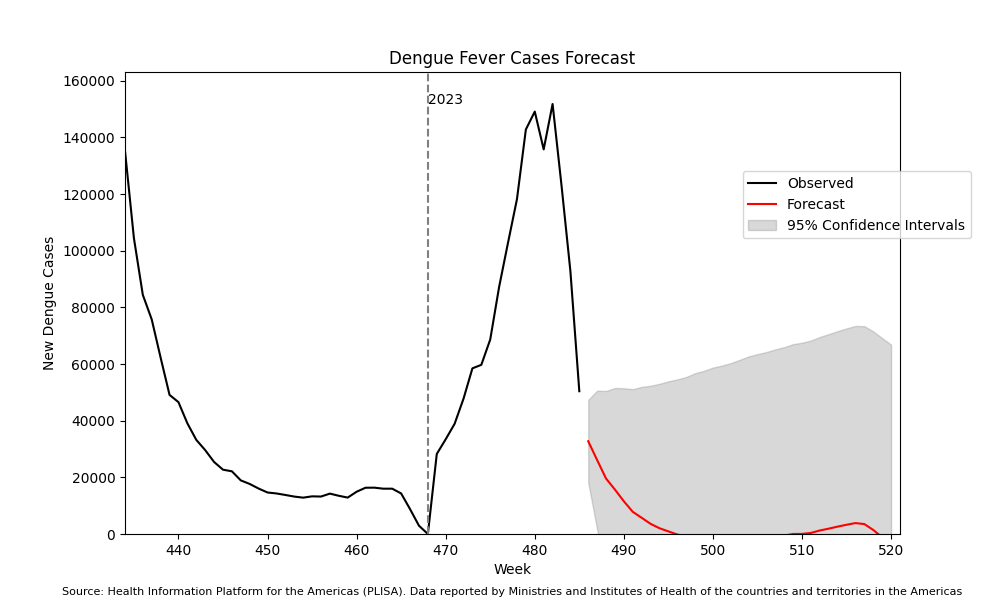

In [409]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Extract the last 52 weeks of data
last_52_weeks = time_series[-52:]

# Plot the observed data
plt.plot(last_52_weeks.index, last_52_weeks.values, label='Observed')

# Plot the forecasted values
forecast_weeks = range(forecast_start_week, forecast_end_week)
plt.plot(forecast_weeks, forecasted_values[-len(forecast_weeks):], color='r', label='Forecast')

# Plot the confidence intervals
confidence_intervals_last_52_weeks = confidence_intervals[-len(forecast_weeks):]
plt.fill_between(forecast_weeks, confidence_intervals_last_52_weeks.iloc[:, 0], confidence_intervals_last_52_weeks.iloc[:, 1], color='gray', alpha=0.3, label='95% Confidence Intervals')

# Add lines and labels for each year
for year in range(2014, 2024):
    week = (year - 2014) * 52
    if week >= time_series.index[-52]:
        plt.axvline(x=week, color='gray', linestyle='--')
        plt.text(week, last_52_weeks.max(), str(year), rotation=0, verticalalignment='baseline')

# Set plot title and labels
plt.title('Dengue Fever Cases Forecast')
plt.xlabel('Week')
plt.ylabel('New Dengue Cases')

plt.ylim(0)
plt.xlim(last_52_weeks.index.min(), forecast_end_week)
# Add legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.133, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 0.8))

# Display the plot
plt.show()


In [412]:
# Prepare the data
filtered_df = df[(df['Year'] != 2023) | df['EW']!=18]

# Create a time series
time_series = pd.Series(filtered_df['New Deaths'].values, index=filtered_df['EW'])

# Reset the index
time_series = time_series.reset_index(drop=True)

time_series

0       0.0
1       6.0
2       7.0
3       7.0
4      12.0
       ... 
481    40.0
482    32.0
483    18.0
484     7.0
485     3.0
Length: 486, dtype: float64

In [413]:
# Fit the SARIMAX model
model = SARIMAX(time_series, order=(1, 0, 1), seasonal_order=(1, 0, 1, 52))
results = model.fit()

# Generate forecasts
forecast_start_week = time_series.index.max() + 1
forecast_end_week = forecast_start_week + 35
forecast = results.get_forecast(steps=35)

# Extract forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

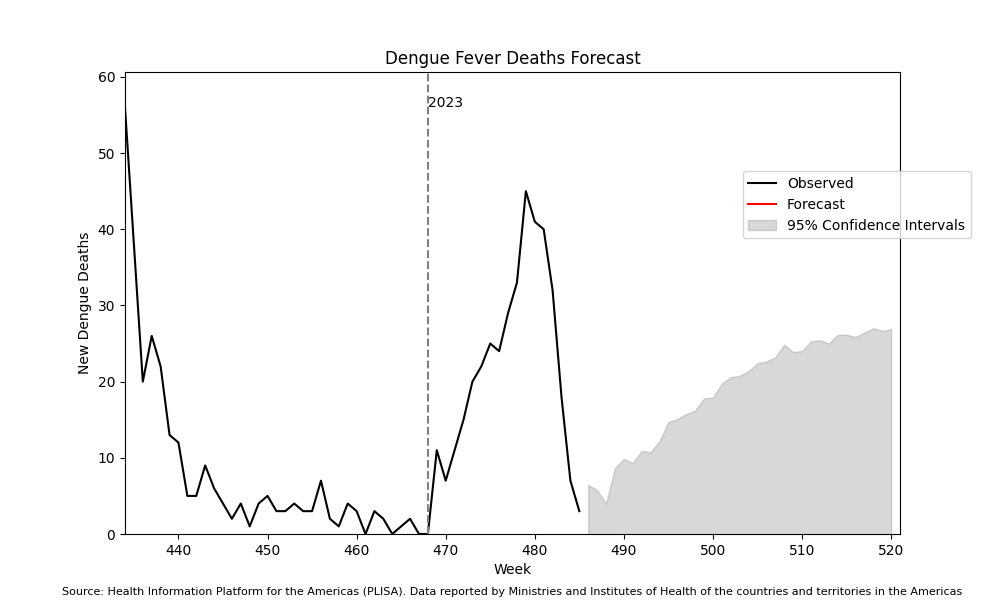

In [417]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Extract the last 52 weeks of data
last_52_weeks = time_series[-52:]

# Plot the observed data
plt.plot(last_52_weeks.index, last_52_weeks.values, label='Observed')

# Plot the forecasted values
forecast_weeks = range(forecast_start_week, forecast_end_week)
plt.plot(forecast_weeks, forecasted_values[-len(forecast_weeks):], color='r', label='Forecast')

# Plot the confidence intervals
confidence_intervals_last_52_weeks = confidence_intervals[-len(forecast_weeks):]
plt.fill_between(forecast_weeks, confidence_intervals_last_52_weeks.iloc[:, 0], confidence_intervals_last_52_weeks.iloc[:, 1], color='gray', alpha=0.3, label='95% Confidence Intervals')

# Add lines and labels for each year
for year in range(2014, 2024):
    week = (year - 2014) * 52
    if week >= time_series.index[-52]:
        plt.axvline(x=week, color='gray', linestyle='--')
        plt.text(week, last_52_weeks.max(), str(year), rotation=0, verticalalignment='baseline')

# Set plot title and labels
plt.title('Dengue Fever Deaths Forecast')
plt.xlabel('Week')
plt.ylabel('New Dengue Deaths')

plt.ylim(0)
plt.xlim(last_52_weeks.index.min(), forecast_end_week)
# Add legend
plt.legend()

# Add source information
source_text = "Source: Health Information Platform for the Americas (PLISA). Data reported by Ministries and Institutes of Health of the countries and territories in the Americas"
plt.text(0.5, -0.133, source_text, transform=plt.gca().transAxes, fontsize=8, ha='center')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 0.8))

# Display the plot
plt.show()
